In [33]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
rating = pd.read_csv('./ml-latest-small/ratings.csv')
movies = pd.read_csv('./ml-latest-small/movies.csv')
links = pd.read_csv('./ml-latest-small/links.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

### QUESTION 1: Compute the sparsity of the movie rating dataset, where sparsity is defined by

Sparsity = Total number of available ratings / Total number of possible ratings (1)

In [32]:
available_rating = rating.drop_duplicates(subset = ['movieId', 'userId']).shape[0]
possible_rating = pd.unique(movies['movieId']).shape[0] * pd.unique(rating['userId']).shape[0]
sparsity = available_rating * 1.0 / possible_rating 
print('Sparsity of rating dataset is %0.5f' % sparsity)

Sparsity of rating dataset is 0.01697


### Plot a histogram showing the frequency of the rating values.

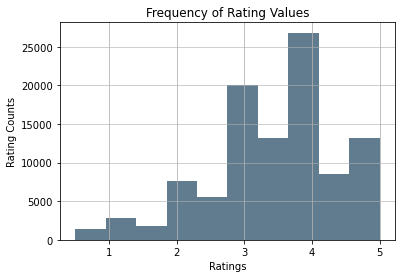

In [50]:
rating['rating'].plot.hist(grid=True, bins=10, color='#607c8e')
plt.title('Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Rating Counts')
plt.grid(axis='y', alpha=0.75)

Most of the ratings are greater than or equal to 3.0. 4.0 is the mode of ratings. People refer to rate movie by the multiple of 1 instead of 0.5.

### QUESTION 3: Plot the distribution of the number of ratings received among movies.

Text(0, 0.5, 'Rating Counts')

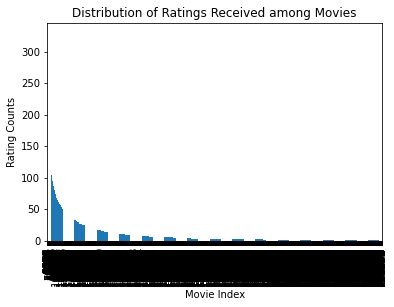

In [58]:
rating.movieId.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of Ratings Received among Movies')
plt.xlabel('Movie Index')
plt.ylabel('Rating Counts')

### Q4 Plot the distribution of ratings among users

Text(0, 0.5, 'Rating Counts')

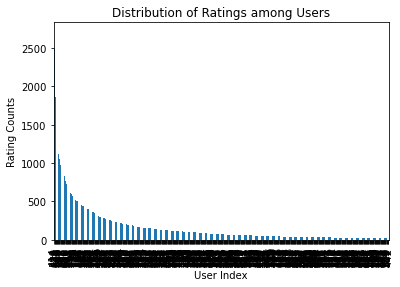

In [59]:
rating.userId.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of Ratings among Users')
plt.xlabel('User Index')
plt.ylabel('Rating Counts')

### QUESTION 5: Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.


This indicates that both ratings received per movie and ratings per user have lots of long tail data. Namely, only very few movie, say less than 10% received high volume of ratings and only very few users provide high volume of ratings. Most movies only have very few ratings and most users only have very few ratings. 

Movies in the right side of graph are less rated than the those in left side. This means that there are much more sparsity or unobserved areas for those items in ratings matrix. This can cause a recommender system which relies on neighborhood algorithms produce bad results.

### QUESTION 6: Compute the variance of the rating values received by each movie.

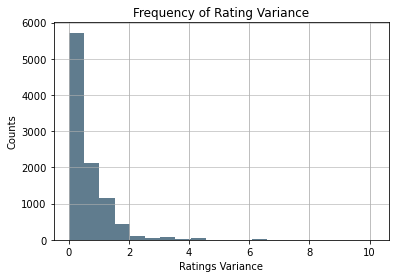

In [77]:
movie_var = rating.groupby(['movieId'])['rating'].var().reset_index()
movie_var = movie_var.fillna(0)

movie_var['rating'].plot.hist(grid=True, bins=20, color='#607c8e')
plt.title('Frequency of Rating Variance')
plt.xlabel('Ratings Variance')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Most of movies has a consistent rating, namely their variance of rating is very small.

###  Question 7 Write down the formula for $µ_{u}$ in terms of $I_{u}$ and $r_{uk}$


$µ_{u} = \Large\frac{\sum_{k} r_{uk}*\mathbb{1}_{I_{u}} (k)}{\sum_{k} \mathbb{1}_{I_{u}} (k)}$

### QUESTION 8: In plain words, explain the meaning of $I_{u}$ ∩ $I_{v}$.

A set of movies that rated by both user u and user v. It can be an empty set if none of user u and user v has rated the movie before.

### QUESTION 9: Can you explain the reason behind mean-centering the raw ratings ($r_{vj} − µ_{v}$) in the prediction function?

The absolute value of rating cannot tell the somebody's view on a movie, but the signal of their rating minus mean of their rating can. If rating minus mean of rating is positive, then they think the movie is positive. If rating minus mean of rating is negative, then their point of view of the movie is negative. For example, 4 means positive for somebody with mean of rating of 3 and means negative for somebody with mean of rating of 4.5.

### Question 10: Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).


In [79]:
!pip install surprise

Using legacy 'setup.py install' for scikit-surprise, since package 'wheel' is not installed.
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'done'


distutils: c:\users\yugua\appdata\local\programs\python\python37\Include\UNKNOWN
sysconfig: c:\users\yugua\appdata\local\programs\python\python37\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\yugua\appdata\local\programs\python\python37\Include\UNKNOWN
sysconfig: c:\users\yugua\appdata\local\programs\python\python37\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\yugua\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [81]:
import surprise as surprise
from surprise import Dataset
from surprise import Reader

#define a dataframe dictionary
ratings_dict = {'userId': rating.userId,
                'movieId': rating.movieId,
                'rating': rating.rating}

df_original = pd.DataFrame(ratings_dict)
df = pd.DataFrame(ratings_dict)

#define the reader
reader = Reader(rating_scale=(0,5))

#load the R_matrix dataframe using the surprise dataset module
data = Dataset.load_from_df(df,reader)

display(df)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [111]:
pd.DataFrame(data.__dict__['raw_ratings'])

,0,1,2,3
0,1,1,4.0,None
1,1,3,4.0,None
2,1,6,4.0,None
3,1,47,5.0,None
4,1,50,5.0,None
...,...,...,...,...
100831,610,166534,4.0,None
100832,610,168248,5.0,None
100833,610,168250,5.0,None
100834,610,168252,5.0,None


In [91]:
from surprise.model_selection import KFold
from surprise import KNNBasic
from surprise import similarities
from surprise import accuracy
import statistics as stats

#create a list of the latent factors
k_factors = []
start = 2
end = 100
step = 2
for i in range(int(end/step)):
    temp = start + step*i
    k_factors.append(temp)
#print(latent_factors)

#define a cross-validation iterator
kf = KFold(n_splits=10)

sim_options = {
    'name': 'pearson',
    'user_based': 'True'
}


rmse_mean_list = []
mae_mean_list = []
#iterate through the training splits to train the algo
for j in range(len(k_factors)):
    print(j)
    algo = KNNBasic(k=k_factors[j], sim_options = sim_options, verbose = False)
    rmse_list = []
    mae_list = []
    for trainset, testset in kf.split(data):
        #train and test algorithm
        algo.fit(trainset)

        #predict
        predictions = algo.test(testset)

        #compute and print RMSE
        rmse_list.append(accuracy.rmse(predictions,verbose=False))
        mae_list.append(accuracy.mae(predictions,verbose=False))
    rmse_mean_list.append(stats.mean(rmse_list))
    mae_mean_list.append(stats.mean(mae_list))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


[1.1123799107879846, 1.0264188337044764, 0.9999733739373717, 0.9867561285884333, 0.9792654501167574, 0.9771788780614065, 0.9735301579235465, 0.9717592937346775, 0.9703565303040829, 0.968459969355995, 0.9671160716100095, 0.9668784182532997, 0.9680350588546921, 0.9669916388018993, 0.9672345310860169, 0.9656263915423972, 0.9656454754759566, 0.9653273473261517, 0.9659773304188143, 0.9654384650448586, 0.9651702611462036, 0.9665942309189519, 0.96615704801196, 0.9666661985511904, 0.9658956436925749, 0.9669841281704026, 0.966307978216733, 0.966928981933748, 0.9668580969103638, 0.9664605578156636, 0.9660199533644841, 0.9677567082935803, 0.9666629112581581, 0.9659174135022859, 0.9647995780076997, 0.9645835002769665, 0.9665073973872027, 0.9662144678210316, 0.9670220878442085, 0.9665474528159405, 0.9668197361285903, 0.9662147545599722, 0.9664969253377923, 0.9664328798044333, 0.9668247548183988, 0.96632084578576, 0.9660460006494359, 0.9661900515786584, 0.9671599767319707, 0.9670111767231595]


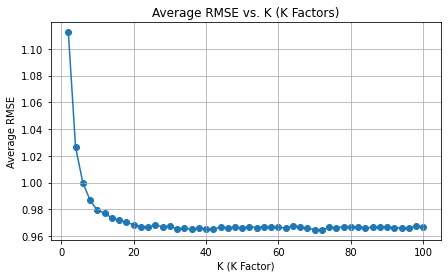

In [92]:
'''
Average RMSE vs. K
'''

# mean_rmse = Q17_results_df.mean_test_rmse
print(rmse_mean_list)


plt.figure(figsize=(7,4))
plt.scatter(k_factors,rmse_mean_list)
plt.plot(k_factors,rmse_mean_list)
# listOf_Xticks = np.arange(2, 52, 2)
# plt.xticks(listOf_Xticks)
plt.grid()
plt.title("Average RMSE vs. K (K Factors)")
plt.xlabel("K (K Factor)")
plt.ylabel("Average RMSE")
plt.show()

[0.8588846162983239, 0.7960604288243847, 0.7745923641702278, 0.7643138609596309, 0.7575113244286561, 0.755231022354369, 0.7528232751685421, 0.7508820177030802, 0.7492598203820678, 0.7485648024347921, 0.7471235001466376, 0.7472506725913666, 0.7478571832613576, 0.7470902528196538, 0.7468384733127107, 0.7458183898966633, 0.7464032552749796, 0.7454197137719828, 0.7462343951589088, 0.7453471720172448, 0.7449650297930747, 0.7463101813249717, 0.7459887462782088, 0.7463731463402802, 0.745616115595101, 0.746454479750716, 0.745890974827486, 0.7467490327651642, 0.7465737895146516, 0.7459857104808187, 0.7462577713061757, 0.7473683009430624, 0.7465646803160995, 0.7460434458004923, 0.7453477217653307, 0.7450129163919075, 0.7464014455487368, 0.7459518202197303, 0.7464778970347447, 0.746899581861515, 0.7468505926615561, 0.7461648794868369, 0.7466649095758687, 0.746328052869178, 0.7465124349193214, 0.7461341771215437, 0.7461442907363258, 0.7463048410381032, 0.7466891457986301, 0.7466110690633474]


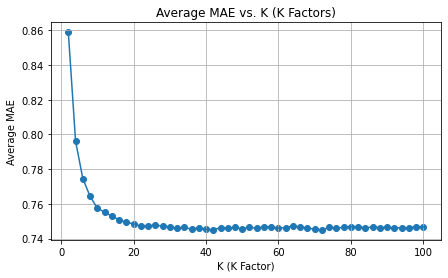

In [93]:
'''
Average MAE vs. K
'''

# mean_rmse = Q17_results_df.mean_test_rmse

plt.figure(figsize=(7,4))
plt.scatter(k_factors,mae_mean_list)
plt.plot(k_factors,mae_mean_list)
# listOf_Xticks = np.arange(2, 52, 2)
# plt.xticks(listOf_Xticks)
plt.grid()
plt.title("Average MAE vs. K (K Factors)")
plt.xlabel("K (K Factor)")
plt.ylabel("Average MAE")
plt.show()

In [ ]:
#get the minimum RMSE and MAE values

total_genres = 18

min_RMSE = min(mean_rmse)
min_MAE = min(mean_mae)

#get the k value based on the returned index from the mean_test column in the dataframe
k_opt_rmse = latent_factors[Q20_results_df.mean_test_rmse.idxmin()]
k_opt_mae = latent_factors[Q20_results_df.mean_test_mae.idxmin()]

print("Minimum RMSE =", round(min_RMSE,5), "@ k =", k_opt_rmse)
print("Minimum MAE =", round(min_MAE,5), "@ k =", k_opt_mae)

### QUESTION 11: Use the plot from question 10, to find a ’minimum k’. 

The minimum K should be 20 (or 10). After K >= 10, when we increase K, the RMSE and MAE will only drop for less then 0.02. However, after K >= 20, when we increase K, the RMSE and MAE will almost not drop at all. 

### QUESTION 12: Design a k-NN collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

In [158]:
movie_rating_cnt = rating.movieId.value_counts().reset_index().rename(columns={'index':'movieId','movieId' : 'count'})
popular_movie = list(movie_rating_cnt[movie_rating_cnt['count'] > 2].movieId)

In [144]:
def trim(testset, movieId):
    return [i for i in testset if i[1] in movieId]

testset:
10084
trimmed test set:
9463


In [159]:
popular_rmse_mean_list = []
popular_mae_mean_list = []
#iterate through the training splits to train the algo
for j in range(len(k_factors)):
    if j % 10 == 0:
        print(j)
        
    algo = KNNBasic(k=k_factors[j], sim_options = sim_options, verbose = False)
    popular_rmse_list = []
    popular_mae_list = []
    for trainset, testset in kf.split(data):
        #train and test algorithm
        algo.fit(trainset)

        #predict
        trimmed_test = trim(testset, popular_movie)
        predictions = algo.test(trimmed_test)

        #compute and print RMSE
        popular_rmse_list.append(accuracy.rmse(predictions,verbose=False))
        popular_mae_list.append(accuracy.mae(predictions,verbose=False))
    popular_rmse_mean_list.append(stats.mean(popular_rmse_list))
    popular_mae_mean_list.append(stats.mean(popular_mae_list))

0
10
20
30
40


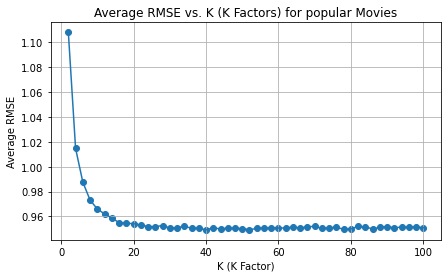

In [160]:
'''
Average RMSE vs. K
'''
plt.figure(figsize=(7,4))
plt.scatter(k_factors,popular_rmse_mean_list)
plt.plot(k_factors,popular_rmse_mean_list)
# listOf_Xticks = np.arange(2, 52, 2)
# plt.xticks(listOf_Xticks)
plt.grid()
plt.title("Average RMSE vs. K (K Factors) for popular Movies")
plt.xlabel("K (K Factor)")
plt.ylabel("Average RMSE")
plt.show()

In [161]:
print('Minumum Average RMSE for popular movies is %0.4f' % min(popular_rmse_mean_list))

Minumum Average RMSE for popular movies is 0.9492


### QUESTION 13: Design a k-NN collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

In [146]:
unpopular_movie = list(movie_rating_cnt[movie_rating_cnt['count'] <= 2].movieId)

In [150]:
unpopular_rmse_mean_list = []
unpopular_mae_mean_list = []
#iterate through the training splits to train the algo
for j in range(len(k_factors)):
    if j % 10 == 0:
        print(j)
        
    algo = KNNBasic(k=k_factors[j], sim_options = sim_options, verbose = False)
    unpopular_rmse_list = []
    unpopular_mae_list = []
    for trainset, testset in kf.split(data):
        #train and test algorithm
        algo.fit(trainset)

        #predict
        trimmed_test = trim(testset, unpopular_movie)
        predictions = algo.test(trimmed_test)

        #compute and print RMSE
        unpopular_rmse_list.append(accuracy.rmse(predictions,verbose=False))
        unpopular_mae_list.append(accuracy.mae(predictions,verbose=False))
    unpopular_rmse_mean_list.append(stats.mean(unpopular_rmse_list))
    unpopular_mae_mean_list.append(stats.mean(unpopular_rmse_list))

0
10
20
30
40


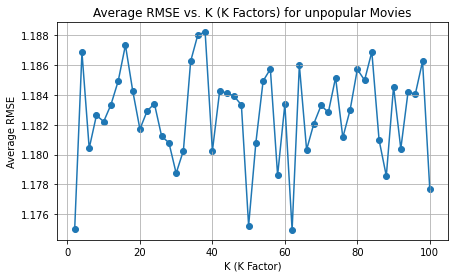

In [155]:
'''
Average RMSE vs. K
'''


plt.figure(figsize=(7,4))
plt.scatter(k_factors,unpopular_rmse_mean_list)
plt.plot(k_factors,unpopular_rmse_mean_list)
# listOf_Xticks = np.arange(2, 52, 2)
# plt.xticks(listOf_Xticks)
plt.grid()
plt.title("Average RMSE vs. K (K Factors) for unpopular Movies")
plt.xlabel("K (K Factor)")
plt.ylabel("Average RMSE")
plt.show()

In [157]:
print('Minumum Average RMSE for popular movies is %0.4f' % min(unpopular_rmse_mean_list))

Minumum Average RMSE for popular movies is 1.1750


### QUESTION 14: Design a k-NN collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [178]:
movie_var = rating.groupby('movieId')['rating'].var().reset_index().rename(columns={'rating' : 'rating_variance'})
high_var_movie = list(set(movie_var[movie_var['rating_variance'] >= 2].movieId).intersection(set(movie_rating_cnt[movie_rating_cnt['count'] >= 5].movieId)))

In [182]:
high_var_rmse_mean_list = []
high_var_mae_mean_list = []
#iterate through the training splits to train the algo
for j in range(len(k_factors)):
    if j % 10 == 0:
        print(j)
        
    algo = KNNBasic(k=k_factors[j], sim_options = sim_options, verbose = False)
    high_var_rmse_list = []
    high_var_mae_list = []
    for trainset, testset in kf.split(data):
        #train and test algorithm
        algo.fit(trainset)

        #predict
        trimmed_test = trim(testset, high_var_movie)
        predictions = algo.test(trimmed_test)

        #compute and print RMSE
        high_var_rmse_list.append(accuracy.rmse(predictions,verbose=False))
        high_var_mae_list.append(accuracy.mae(predictions,verbose=False))
    high_var_rmse_mean_list.append(stats.mean(high_var_rmse_list))
    high_var_mae_mean_list.append(stats.mean(high_var_mae_list))

0
10
20
30
40


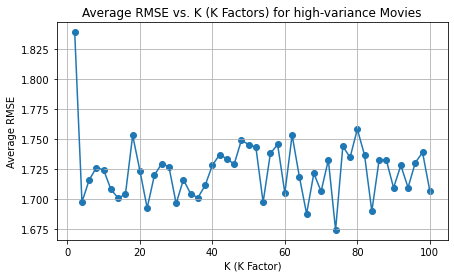

In [183]:
'''
Average RMSE vs. K
'''
plt.figure(figsize=(7,4))
plt.scatter(k_factors,high_var_rmse_mean_list)
plt.plot(k_factors,high_var_rmse_mean_list)
# listOf_Xticks = np.arange(2, 52, 2)
# plt.xticks(listOf_Xticks)
plt.grid()
plt.title("Average RMSE vs. K (K Factors) for high-variance Movies")
plt.xlabel("K (K Factor)")
plt.ylabel("Average RMSE")
plt.show()

In [184]:
print('Minumum Average RMSE for popular movies is %0.4f' % min(high_var_rmse_mean_list))

Minumum Average RMSE for popular movies is 1.6746


### QUESTION 15: Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the k found in question 11. For each of the plots, also report the area under the curve (AUC) value.


In [185]:
'''
This function handles plotting the ROC curve using fpr and tpr arrays
'''
def plot_roc(fpr, tpr, title):
    #create figure and axis handles
    fig, ax = plt.subplots()
    
    #compute the area under the ROC curve
    roc_area = auc(fpr,tpr)
    
    #plot the ROC
    ax.plot(fpr, tpr, lw=2, label='Area under ROC = %0.4f' % roc_area)
    
    #add a grid
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    
    #set axes props
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=15)
    ax.set_ylabel('True Positive Rate', fontsize=15)
    
    #add a legend
    ax.legend(loc="lower right")
    
    #set the size of the tickmarks
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(15)
        
    #give title
    plt.title(title)
        
    plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.


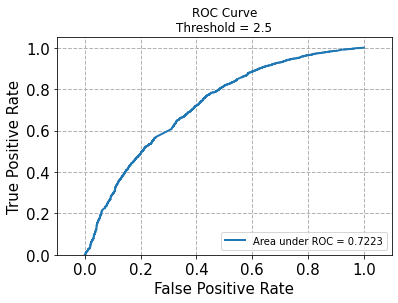

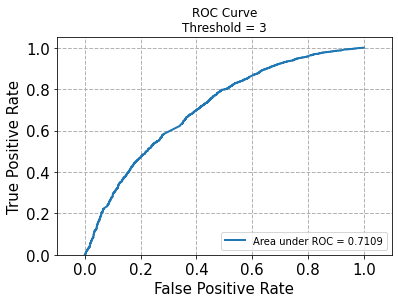

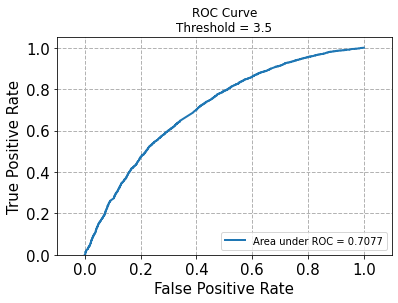

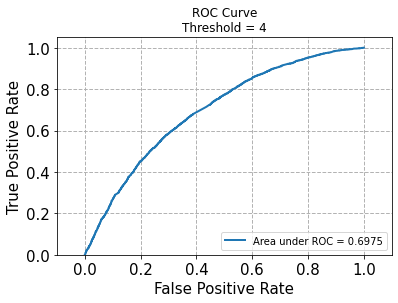

In [188]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

trainset, testset = train_test_split(data, test_size=.10) #9 sets to train 1 set to test

algo = KNNBasic(k=20, sim_options = sim_options)
#train the algorithm using the training sets
algo.fit(trainset)

#use the trainined algoritm
predictions = algo.test(testset)

ground_truths = []
predicted_ratings = []

for i in predictions:
    ground_truths.append(i.r_ui)
    predicted_ratings.append(i.est)
    

thresholds = [2.5, 3, 3.5, 4]

for i in thresholds:
    true = np.array(ground_truths) >= i
    predicted = predicted_ratings
    fpr, tpr, _ = roc_curve(true, predicted)

    #call the plot ROC function
    title = "ROC Curve\nThreshold = " + str(i)
    plot_roc(fpr, tpr, title)